In [9]:
import lightkurve as lk
import numpy as np
import pickle
import os
import sys
import pandas as pd
import requests

In [10]:
data_period = 2.638 
data_epoch = 1518.92
data_duration = 0.15

In [11]:
lcs = lk.search_lightcurve('TIC 145241359', author='QLP', cadence='long').download_all()
lc = lcs.stitch()
lc_clean = lc.remove_outliers(sigma=20, sigma_upper=4)
temp_fold = lc_clean.fold(data_period, epoch_time=data_epoch)
fractional_duration = (data_duration / 24.0) / data_period
phase_mask = np.abs(temp_fold.phase.value) < (fractional_duration * 1.5)
transit_mask = np.in1d(lc_clean.time.value, temp_fold.time_original.value[phase_mask])
lc_flat, trend_lc = lc_clean.flatten(return_trend=True, mask=transit_mask)
lc_fold = lc_flat.fold(data_period, epoch_time=data_epoch)
lc_global = lc_fold.bin(time_bin_size=0.005).normalize() - 1
lc_global = (lc_global / np.abs(lc_global.flux.min()) ) * 2.0 + 1

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

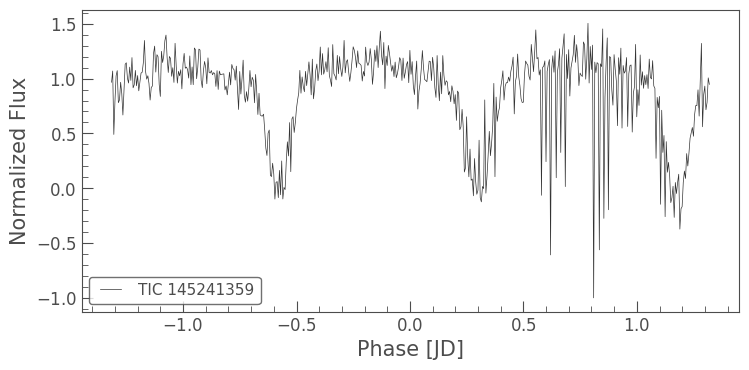

In [12]:
lc_global.plot()

In [13]:
phase_mask = (lc_fold.phase > -4*fractional_duration) & (lc_fold.phase < 4.0*fractional_duration)
lc_zoom = lc_fold[phase_mask]
lc_local = lc_zoom.bin(time_bin_size=0.0005).normalize() - 1
lc_local = (lc_local / np.abs(np.nanmin(lc_local.flux)) ) * 2.0 + 1
lc_local.flux.shape


(33,)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

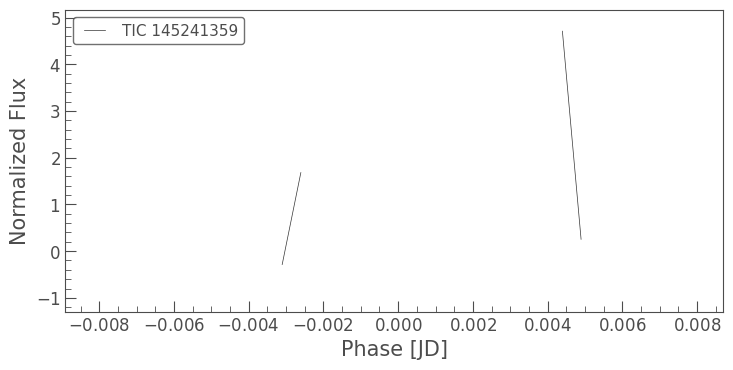

In [14]:
lc_local.plot()